In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep
from mplhep import *
linestyle_str = [
('solid', 'solid'), # Same as (0, ()) or '-'
('dotted', '.'),# Same as (0, (1, 1)) or '.'
('dashed', '--'),   # Same as '--'
('dashdot', '-.')]  # Same as '-.'
from matplotlib.pyplot import *
import matplotlib as mpl
plt.rc('text', usetex=True)
plt.rc('font', family='Times New Roman')
from  matplotlib import *
mpl.rcParams['figure.figsize'] = (10,6)
import sympy as sy
sy.init_printing()
from sympy import *
%matplotlib inline

In [14]:
gchi, MZp, gqV, gqL, gqR, Me, MMU, MTA, MU, MC, MT, MD, MS, MB, Mchi, Mq, X, cw = sy.symbols('gchi MZp gqV gqL gqR ME MMU Mta Mu Mc Mt Md MS Mb Mchi Mq X cw', real=True)
gZp = 1 
gsd = -2*gchi
sw = sy.sqrt(1-cw**2)
#xev = MZp/(2*gchi)
gqA =0
gqL = gqV + gqA
gqR = gqV - gqA

In [15]:
def Zpuu(MZp, gqA, gqV):
    Zpuu =  simplify(simplify( ((-48*gqA**2*MU**2 + 48*gqA*gqL*gZp*MU**2 - 48*gqA*gqR*gZp*MU**2 - 6*gqL**2*gZp**2*MU**2 + 36*gqL*gqR*gZp**2*MU**2 - 6*gqR**2*gZp**2*MU**2 + 12*gqA**2*MZp**2 - 12*gqA*gqL*gZp*MZp**2 + 12*gqA*gqR*gZp*MZp**2 + 6*gqL**2*gZp**2*MZp**2 + 6*gqR**2*gZp**2*MZp**2)*sy.sqrt(-4*MU**2*MZp**2 + MZp**4))/(48*sy.pi*abs(MZp)**3)
                               ).subs(MU**2, X *MZp**2)).subs(X, MU**2 /MZp**2)
    return Zpuu 
            
def Zpcc(MZp, gq):
    Zpcc = simplify(simplify( ((-48*gqA**2*MC**2 + 24*gq**2*gZp**2*MC**2 + 12*gqA**2*MZp**2 + 12*gq**2*gZp**2*MZp**2)*sy.sqrt(-4*MC**2*MZp**2 + MZp**4))/(48*sy.pi*abs(MZp)**3)
            ).subs(MC**2, X *MZp**2)).subs(X, MC**2 /MZp**2)
    return Zpcc

def Zptt(MZp, gq):
    Zptt = simplify(simplify( ((-48*gqA**2*MT**2 + 24*gq**2*gZp**2*MT**2 + 12*gqA**2*MZp**2 + 12*gq**2*gZp**2*MZp**2)*sy.sqrt(-4*MT**2*MZp**2 + MZp**4))/(48*sy.pi*abs(MZp)**3)
                      ).subs(MT**2, X *MZp**2)).subs(X, MT**2 /MZp**2)
    return Zptt

def Zpdd(MZp, gq):
    Zpdd = simplify(simplify( ((-48*gqA**2*MD**2 + 24*gq**2*gZp**2*MD**2 + 12*gqA**2*MZp**2 + 12*gq**2*gZp**2*MZp**2)*sy.sqrt(-4*MD**2*MZp**2 + MZp**4))/(48*sy.pi*abs(MZp)**3)
                        ).subs(MD**2, X *MZp**2)).subs(X, MD**2 /MZp**2)
    return Zpdd

def Zpss(MZp, gq):
    Zpss = simplify(simplify( ((-48*gqA**2*MS**2 + 24*gq**2*gZp**2*MS**2 + 12*gqA**2*MZp**2 + 12*gq**2*gZp**2*MZp**2)*sy.sqrt(-4*MS**2*MZp**2 + MZp**4))/(48*sy.pi*abs(MZp)**3)
                        ).subs(MS**2, X *MZp**2)).subs(X, MS**2 /MZp**2)
    return Zpss

def Zpbb(MZp, gq):
    Zpbb = simplify(simplify( ((-48*gqA**2*MB**2 + 24*gq**2*gZp**2*MB**2 + 12*gqA**2*MZp**2 + 12*gq**2*gZp**2*MZp**2)*sy.sqrt(-4*MB**2*MZp**2 + MZp**4))/(48*sy.pi*abs(MZp)**3)
                        ).subs(MB**2, X *MZp**2)).subs(X, MB**2 /MZp**2)
    return Zpbb

def ZpXX(MZp, gchi, Mchi):
    ZpXX = simplify(simplify( ((-16*gchi**2*Mchi**2 + 4*gchi**2*MZp**2)*sy.sqrt(-4*Mchi**2*MZp**2 + MZp**4))/(96*sy.pi*abs(MZp)**3)
                        ).subs(Mchi**2, X *MZp**2)).subs(X, Mchi**2 /MZp**2)
    return ZpXX

def Zpqq(MZp, gq):
    Zpqq =  simplify(Zpuu(MZp, gq) + Zpcc(MZp, gq) + Zptt(MZp, gq) + Zpdd(MZp, gq) + Zpss(MZp, gq) + Zpbb(MZp, gq))
    return Zpqq
# BRs
def BR_Zp_qq(MZp, gchi, gq, Mchi): 
    return simplify(Zpqq(MZp, gq) / (Zpqq(MZp, gq) + ZpXX(MZp, gchi, Mchi)))

def BR_Zp_XX(MZp, gchi, gq, Mchi):
    return simplify(ZpXX(MZp, gchi, Mchi) / (Zpqq(MZp, gq) + ZpXX(MZp, gchi, Mchi)))

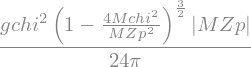

In [10]:
ZpXX(MZp, gchi, Mchi)

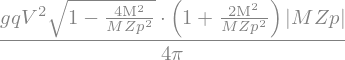

In [16]:
Zpuu(MZp, gqA, gqV)


In [4]:
#Zpbb(MZp, gq)
#print(r'\Gamma(Z^{\prime} \to b b )= ', latex(Zpbb(MZp, gq)))
#print(r'\Gamma(Z^{\prime} \to c c )= ', latex(Zpcc(MZp, gq)))
#print(r'\Gamma(Z^{\prime} \to t t )= ', latex(Zptt(MZp, gq)))
#print(r'\Gamma(Z^{\prime} \to u u )= ', latex(Zpuu(MZp, gq)))
#print(r'\Gamma(Z^{\prime} \to d d )= ', latex(Zpdd(MZp, gq)))
print(r'\Gamma(Z^{\prime} \to s s )= ', latex(Zpss(MZp, gq)))
print(r'Gamma(Z^{\prime} \to q q )= ', latex(Zpqq(MZp, gq)))
print(r'\Gamma(Z^{\prime} \to \chi \chi )= ', latex(ZpXX(MZp, gchi, Mchi)))
print(r'BR (Z^{\prime} \to q q )= ', latex(BR_Zp_qq(MZp, gchi, gq, Mchi)))
print(r'BR (Z^{\prime} \to \chi \chi )= ', latex(BR_Zp_XX(MZp, gchi, gq, Mchi)))
#BR_Zp_XX(MZp, gchi, gq, Mchi)
#BR_Zp_qq(MZp, gchi, gq, Mchi)

\Gamma(Z^{\prime} \to s s )=  \frac{gq^{2} \sqrt{- \frac{4 MS^{2}}{MZp^{2}} + 1} \cdot \left(\frac{2 MS^{2}}{MZp^{2}} + 1\right) \left|{MZp}\right|}{4 \pi}
Gamma(Z^{\prime} \to q q )=  \frac{gq^{2} \left(\sqrt{\frac{- 4 MS^{2} + MZp^{2}}{MZp^{2}}} \cdot \left(2 MS^{2} + MZp^{2}\right) + \sqrt{\frac{MZp^{2} - 4 Mb^{2}}{MZp^{2}}} \left(MZp^{2} + 2 Mb^{2}\right) + \sqrt{\frac{MZp^{2} - 4 Mc^{2}}{MZp^{2}}} \left(MZp^{2} + 2 Mc^{2}\right) + \sqrt{\frac{MZp^{2} - 4 Md^{2}}{MZp^{2}}} \left(MZp^{2} + 2 Md^{2}\right) + \sqrt{\frac{MZp^{2} - 4 Mt^{2}}{MZp^{2}}} \left(MZp^{2} + 2 Mt^{2}\right) + \sqrt{\frac{MZp^{2} - 4 \mathrm{M}^{2}}{MZp^{2}}} \left(MZp^{2} + 2 \mathrm{M}^{2}\right)\right) \left|{MZp}\right|}{4 \pi MZp^{2}}
\Gamma(Z^{\prime} \to \chi \chi )=  \frac{gchi^{2} \left(1 - \frac{4 MchiT^{2}}{MZp^{2}}\right)^{\frac{3}{2}} \left|{MZp}\right|}{24 \pi}
BR (Z^{\prime} \to q q )=  \frac{6 gq^{2} \left(\sqrt{\frac{- 4 MS^{2} + MZp^{2}}{MZp^{2}}} \cdot \left(2 MS^{2} + MZp^{2}\right) + \sqrt{

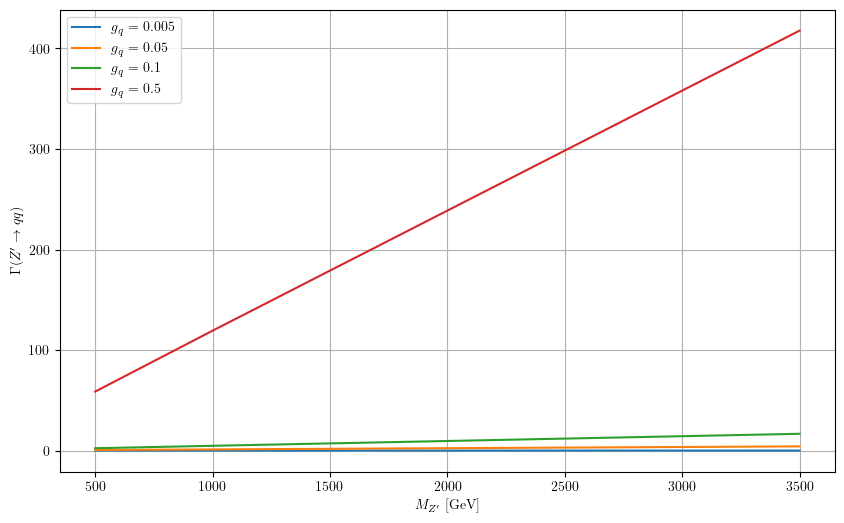

In [43]:
MZp_values = list(range(500, 4000, 500))
Mchi_values = 140
gq_values = [0.005,0.05, 0.1, 0.5]
MU = 0.00255
MC = 1.27
MT = 172
MD = 0.00504
MS = 0.101
MB = 4.7
plt.figure(figsize=(10,6))
for gq in gq_values:
    Gamma_values = [Zpqq(MZp, gq)  for MZp in MZp_values]
    plt.plot(MZp_values, Gamma_values, label=f'$g_q$ = {gq}')
    
plt.xlabel(r'$M_{Z^{\prime}}$ [GeV]')
plt.ylabel(r'$\Gamma(Z^{\prime} \to q q )$')
plt.legend()
plt.grid(True)
plt.show()


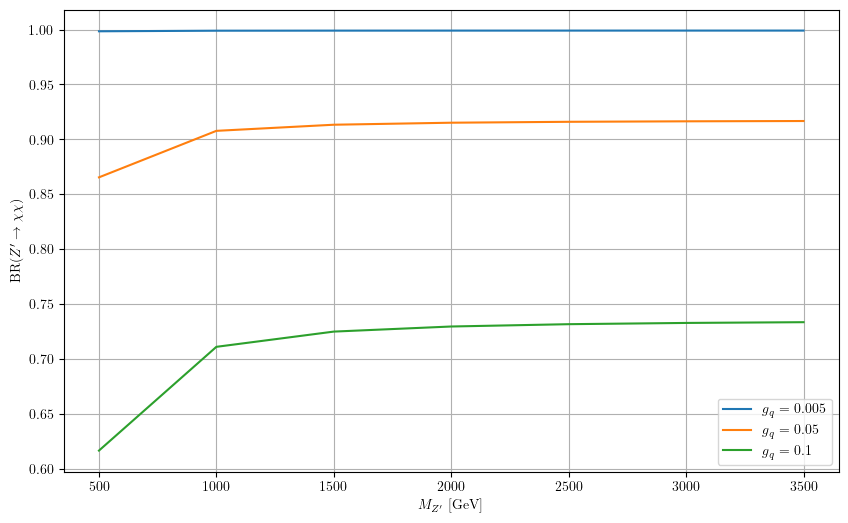

In [5]:
MZp_values = list(range(500, 4000, 500))
MH2_values = list(range(250, 4000, 500))
Mchi_values = 140
gchi_values = 1
gq_values = [0.005,0.05, 0.1]
Sa_values = [0.005,0.05, 0.1, 0.5]
ychi = 1
MU = 0.00255
MC = 1.27
MT = 172
MD = 0.00504
MS = 0.101
MB = 4.7
plt.figure(figsize=(10,6))
for gq in gq_values:
    BR_values = [BR_Zp_XX(MZp, gchi_values, gq, Mchi_values) for MZp in MZp_values]
    plt.plot(MZp_values, BR_values, label=f'$g_q$ = {gq}')
plt.xlabel(r'$M_{Z^{\prime}}$ [GeV]')
plt.ylabel(r'BR($Z^{\prime} \to \chi \chi)$')
plt.legend()
plt.grid(True)
plt.show()
